# <center> Linear Regression </center>

## <center>Boston Housing Rate prediction</center>

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
# Load dataset
from sklearn.datasets import load_boston

boston =load_boston()

df_boston = pd.DataFrame(data = boston.data, columns= boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Get the rows and columns for the dataset
df_boston.shape

(506, 13)

### Data Preprocessing

In [5]:
# Check for null values
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

##### It can be seen that the dataset does not have any null values

In [6]:
# Check for duplicate values
df_boston.duplicated().sum()

0

##### SInce the value returned is 0, there are no duplicate values in the dataset

### Descriptive Statistics

In [7]:
# Gives details of each column in dataset
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
# Details of the mean, median, standard deviation and quartiles for numerical data
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


#### Exploratory Data Analysis

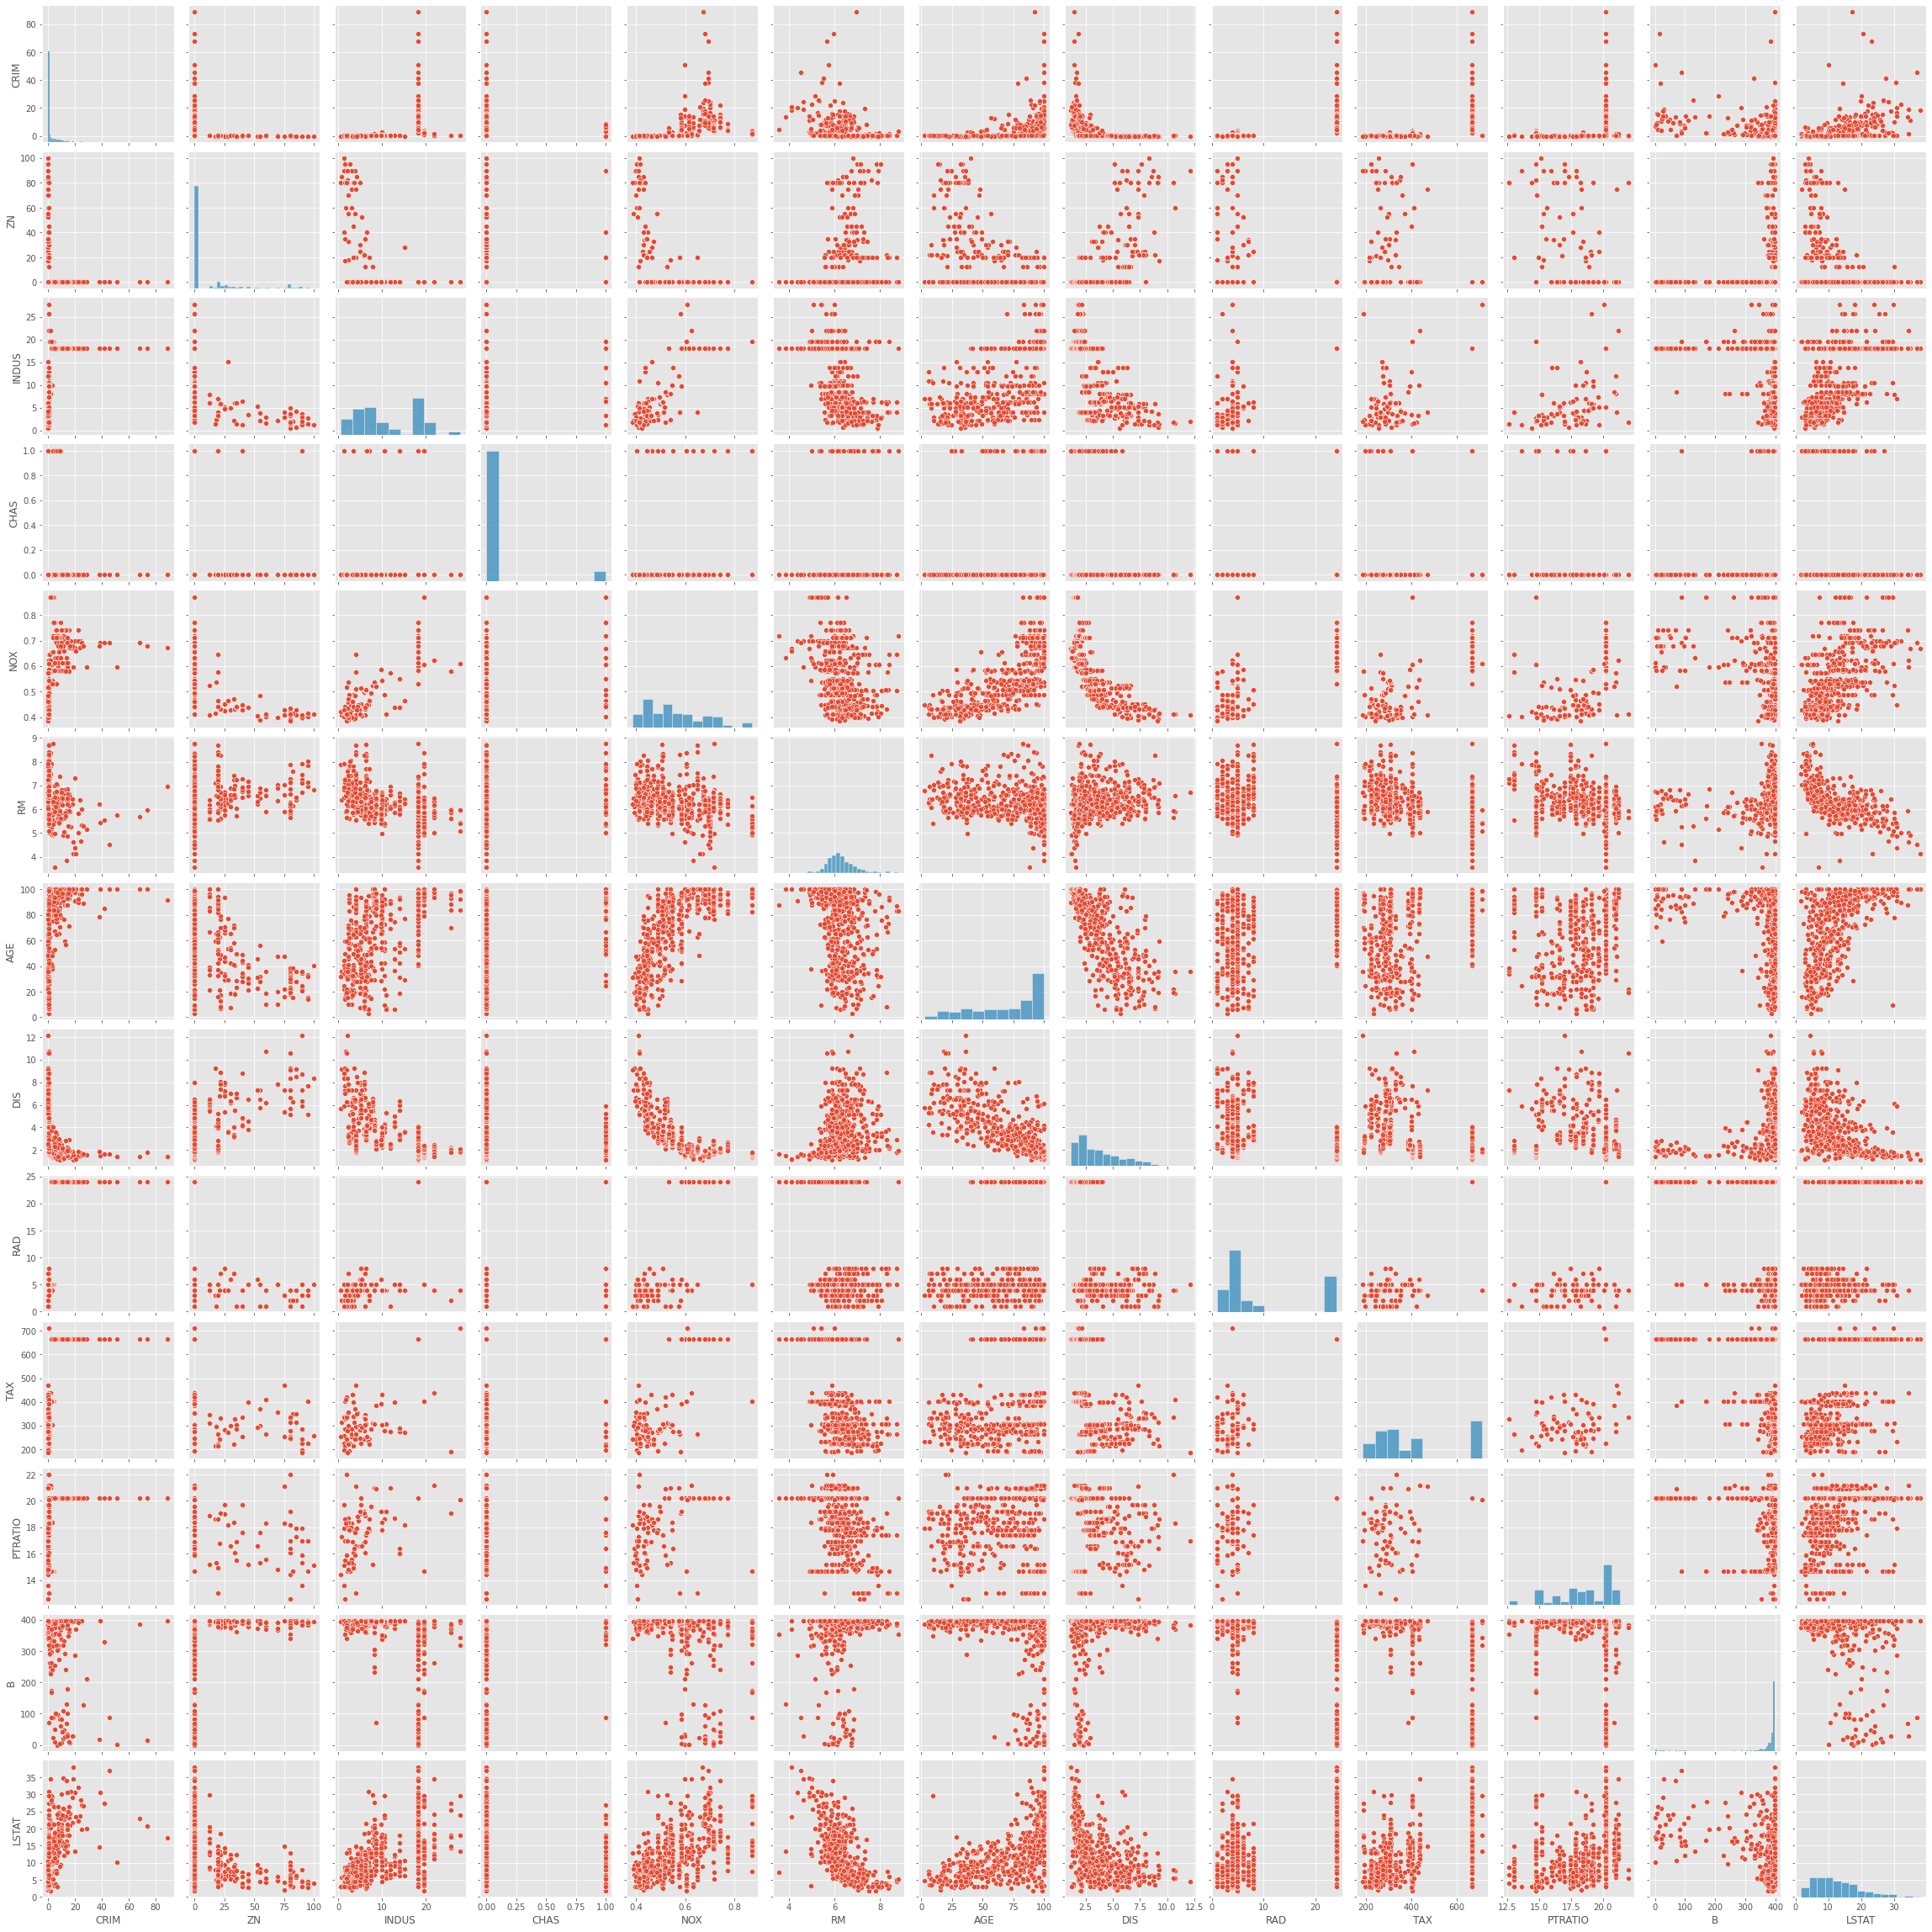

In [9]:
# Check for corelation between data
plt.style.use('ggplot')
g = sns.pairplot(df_boston)

<AxesSubplot:>

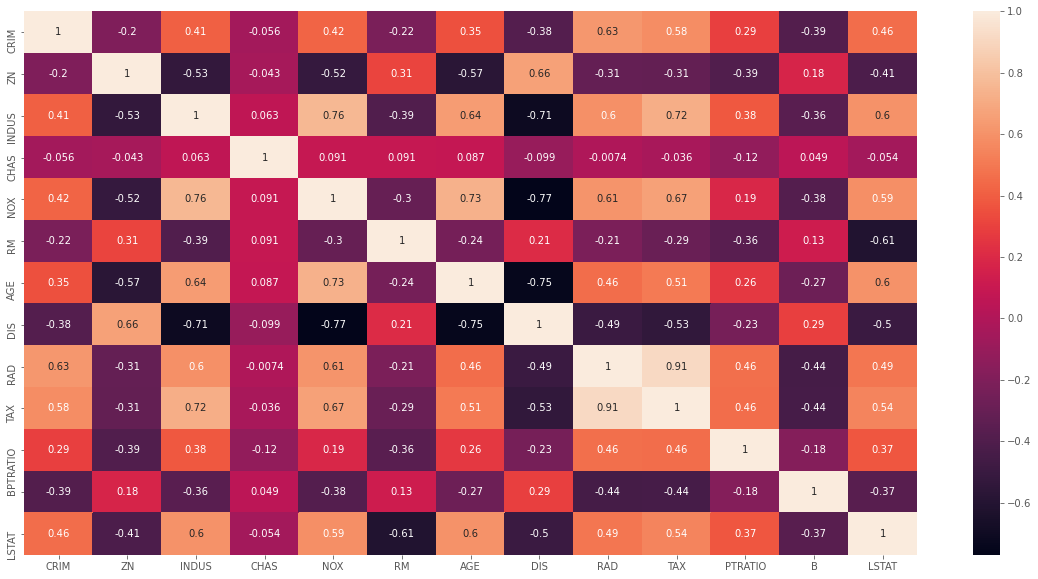

In [10]:
# Correlation
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_boston.corr(), annot=True)

##### We can see that RM is positively correlated with the MEDV and LSTAT is negatively correlated with MEDV

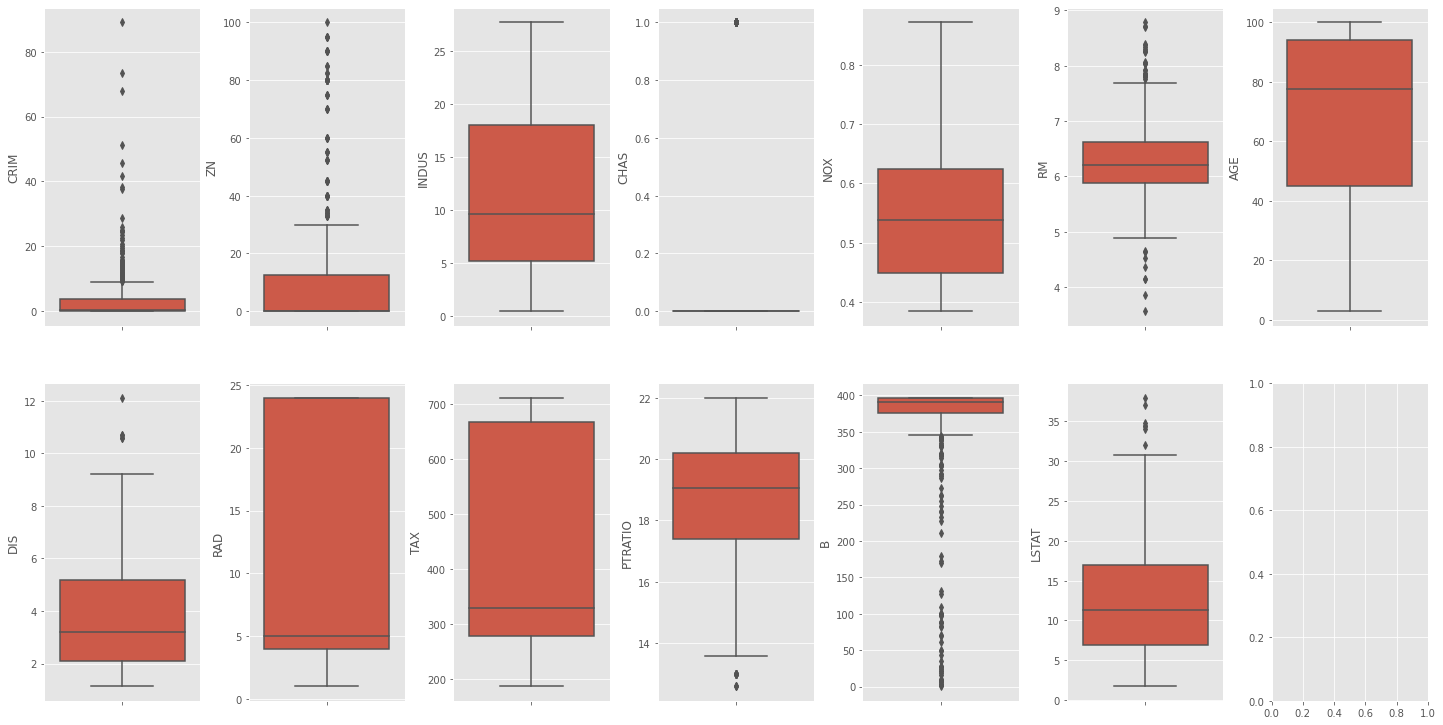

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_boston.items():
    sns.boxplot(y=k, data=df_boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

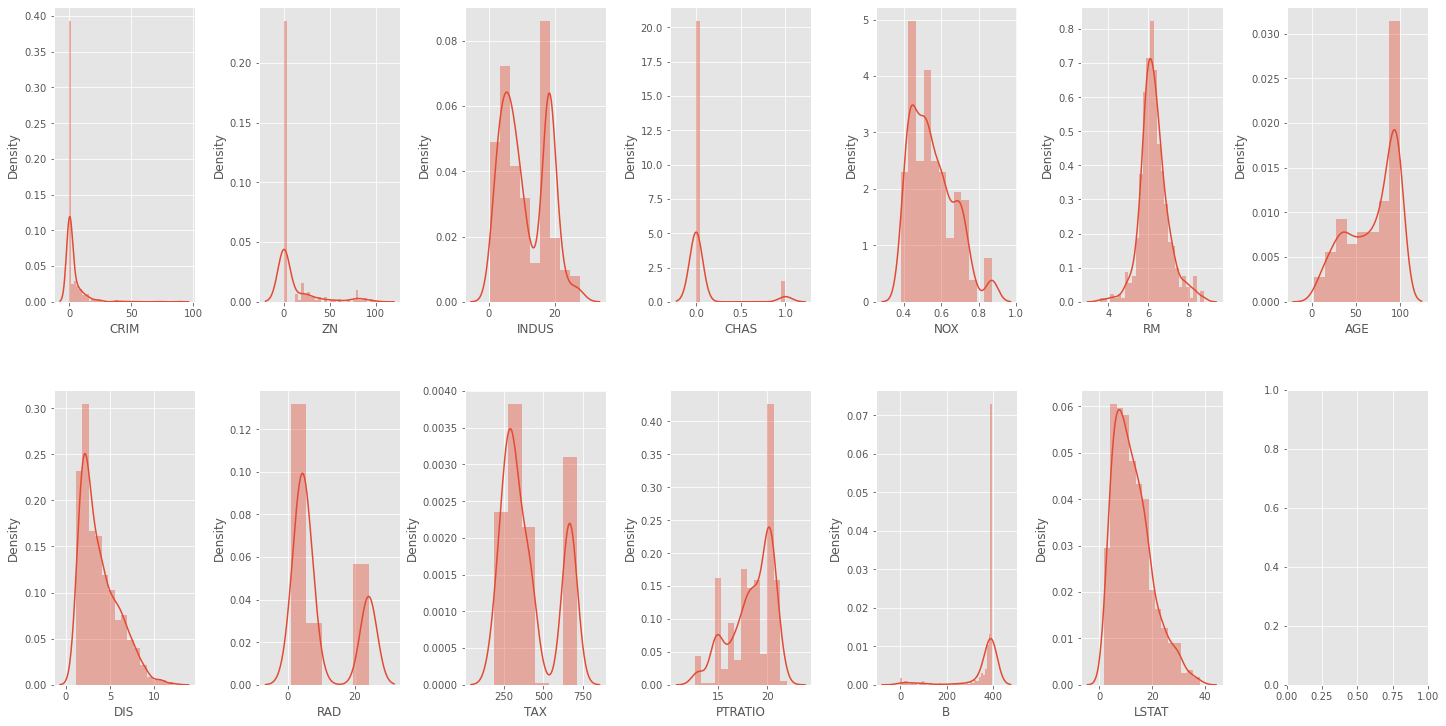

In [12]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_boston.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Split train and test data

In [13]:
# Slice the dataframe into features and target
df_boston_features = df_boston.iloc[:, :-1]
df_boston_target = df_boston.iloc[:,-1:]

In [14]:
# Spliting dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_boston_features, df_boston_target, train_size = 0.8)

In [15]:
# Find the number of rows and columns
X_train.shape, X_test.shape

((404, 12), (102, 12))

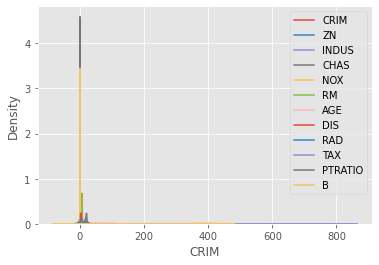

In [16]:
for i in range(len(df_boston.columns[:-1])):
    sns.kdeplot(X_train[df_boston.columns[i]], label = df_boston.columns[i])
    
plt.legend()

In [17]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=df_boston.columns[:-1])
X_test = pd.DataFrame(scaler.transform(X_test), columns=df_boston.columns[:-1])

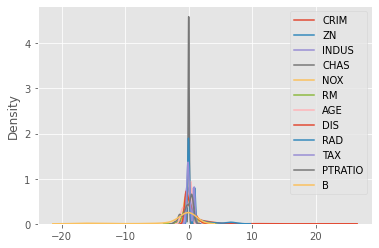

In [18]:
for i in range(len(df_boston.columns[:-1])):
    sns.kdeplot(X_train[df_boston.columns[i]], label = df_boston.columns[i])
    
plt.xlabel("")
plt.legend()

### Building Linear Regression model

In [19]:
# Importing library
from sklearn.linear_model import LinearRegression

# Initialize the model
linear = LinearRegression(fit_intercept= True)

# Fit the model to train set
linear.fit(X_train, Y_train)

# Predict values
linear_pred = linear.predict(X_test)

In [20]:
# Printing intercept
print(linear.intercept_)

[12.60588764]


In [21]:
# Printing coefficients
print(linear.coef_)

[[ 0.31720659  0.15400784  1.76118378 -0.5702726   0.7184623  -3.35094375
   4.43883782  0.64077536  1.15694846 -0.68152992  0.16378258 -0.18084047]]


##### These coefficients are for each of the  feature in the dataset.

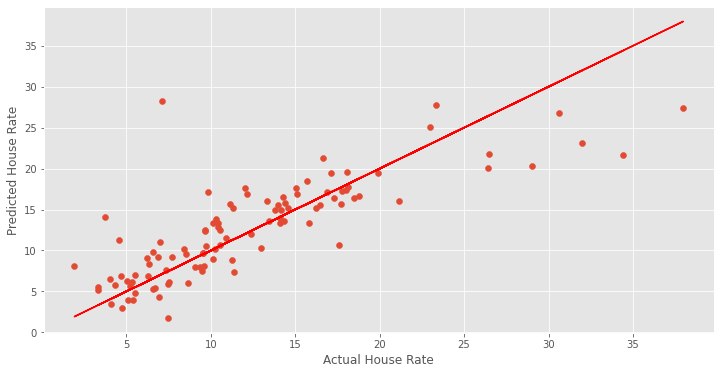

In [22]:
#Visualize the linear regression on testing dataset
plt.figure(figsize=(12,6))
plt.scatter(Y_test, linear_pred)
plt.plot(Y_test, Y_test, color = 'r')
plt.ylabel('Predicted House Rate')
plt.xlabel('Actual House Rate')
plt.show()

### Evaluation Metrics

In [23]:
# Evaluating the prediction with metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("The mean squared error (MSE) is : ", np.round(mean_squared_error(Y_test, linear_pred),2))
print("The mean absolute error (MAE) is : ", np.round(mean_absolute_error(Y_test, linear_pred), 2))
print("The mean root squared error (RSME) is : ", np.round(mean_squared_error(Y_test, linear_pred, squared=False), 2))

The mean squared error (MSE) is :  16.78
The mean absolute error (MAE) is :  2.75
The mean root squared error (RSME) is :  4.1
